# 'The Effects of Mismatched Train and Test Data Cleaning Pipelines on Regression Models: Lessons for Practice' Results Notebook

This notebook loads the results from the experiments into pandas dataframes. These can be analysed separately as desired. We also recreate the figures shown in the paper.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Loading and averaging of results

In [2]:
airbnb_rfr_results = pd.read_csv('airbnb_rfr_results.csv')
airbnb_gbr_results = pd.read_csv('airbnb_gbr_results.csv')
airbnb_xgb_results = pd.read_csv('airbnb_xgb_results.csv')

uscensus_rfr_results = pd.read_csv('uscensus_rfr_results.csv')
uscensus_gbr_results = pd.read_csv('uscensus_gbr_results.csv')
uscensus_xgb_results = pd.read_csv('uscensus_xgb_results.csv')

In [3]:
airbnb_gbr_mean_df = airbnb_gbr_results.groupby(['train_cleaning', 'test_cleaning'], as_index = False).mean()
airbnb_gbr_mean_df = airbnb_gbr_mean_df.drop(['train_test_split'], axis = 1)

airbnb_rfr_mean_df = airbnb_rfr_results.groupby(['train_cleaning', 'test_cleaning'], as_index = False).mean()
airbnb_rfr_mean_df = airbnb_rfr_mean_df.drop(['train_test_split'], axis = 1)

airbnb_xgb_mean_df = airbnb_xgb_results.groupby(['train_cleaning', 'test_cleaning'], as_index = False).mean()
airbnb_xgb_mean_df = airbnb_xgb_mean_df.drop(['train_test_split'], axis = 1)

uscensus_gbr_mean_df = uscensus_gbr_results.groupby(['train_cleaning', 'test_cleaning'], as_index = False).mean()
uscensus_gbr_mean_df = uscensus_gbr_mean_df.drop(['train_test_split'], axis = 1)

uscensus_rfr_mean_df = uscensus_rfr_results.groupby(['train_cleaning', 'test_cleaning'], as_index = False).mean()
uscensus_rfr_mean_df = uscensus_rfr_mean_df.drop(['train_test_split'], axis = 1)

uscensus_xgb_mean_df = uscensus_xgb_results.groupby(['train_cleaning', 'test_cleaning'], as_index = False).mean()
uscensus_xgb_mean_df = uscensus_xgb_mean_df.drop(['train_test_split'], axis = 1)

In [4]:
airbnb_gbr_std_df = airbnb_gbr_results.groupby(['train_cleaning', 'test_cleaning'], as_index = False).std()
airbnb_gbr_std_df = airbnb_gbr_std_df.drop(['train_test_split'], axis = 1)

airbnb_rfr_std_df = airbnb_rfr_results.groupby(['train_cleaning', 'test_cleaning'], as_index = False).std()
airbnb_rfr_std_df = airbnb_rfr_std_df.drop(['train_test_split'], axis = 1)

airbnb_xgb_std_df = airbnb_xgb_results.groupby(['train_cleaning', 'test_cleaning'], as_index = False).std()
airbnb_xgb_std_df = airbnb_xgb_std_df.drop(['train_test_split'], axis = 1)

uscensus_gbr_std_df = uscensus_gbr_results.groupby(['train_cleaning', 'test_cleaning'], as_index = False).std()
uscensus_gbr_std_df = uscensus_gbr_std_df.drop(['train_test_split'], axis = 1)

uscensus_rfr_std_df = uscensus_rfr_results.groupby(['train_cleaning', 'test_cleaning'], as_index = False).std()
uscensus_rfr_std_df = uscensus_rfr_std_df.drop(['train_test_split'], axis = 1)

uscensus_xgb_std_df = uscensus_xgb_results.groupby(['train_cleaning', 'test_cleaning'], as_index = False).std()
uscensus_xgb_std_df = uscensus_xgb_std_df.drop(['train_test_split'], axis = 1)

### Recreation of figures

##### Figure 2

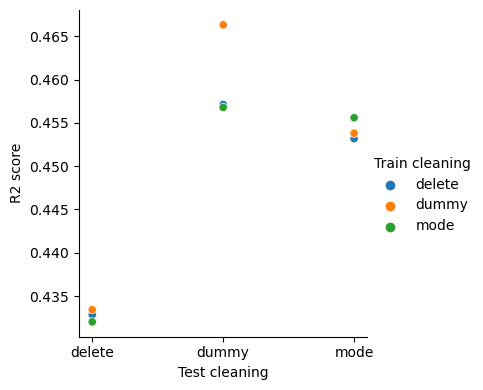

In [5]:
fig = sns.relplot(data=uscensus_rfr_mean_df.rename(columns={"train_cleaning": "Train cleaning", "test_cleaning": "Test cleaning", 'score': 'R2 score'})
                  , x='Test cleaning', y='R2 score', hue='Train cleaning', height = 4)#, aspect=1.61)
plt.show()

##### Figure 3

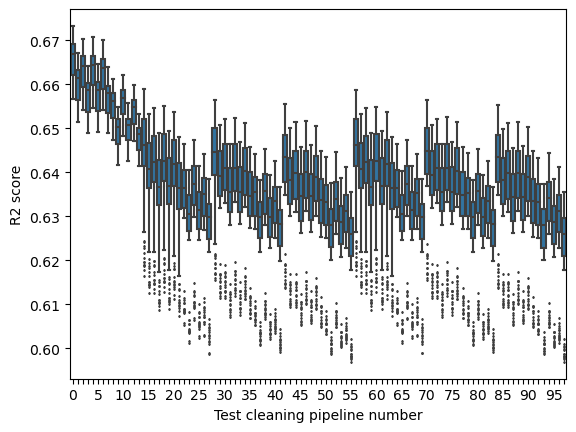

In [6]:
g = sns.boxplot(data=airbnb_rfr_mean_df.rename(columns={"train_cleaning": "Train cleaning", "test_cleaning": "Test cleaning pipeline number", 'score': 'R2 score'})
                , x="Test cleaning pipeline number", y="R2 score", fliersize=1, color=sns.color_palette()[0])
n = 5
for (i,l) in enumerate(g.xaxis.get_ticklabels()):
    if i%n != 0:
        l.set_visible(False)
        
plt.show()

##### Figure 4

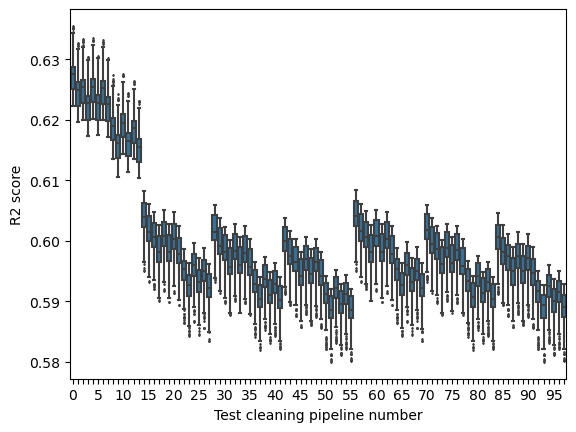

In [7]:
g = sns.boxplot(data=airbnb_gbr_mean_df.rename(columns={"train_cleaning": "Train cleaning", "test_cleaning": "Test cleaning pipeline number", 'score': 'R2 score'})
                , x="Test cleaning pipeline number", y="R2 score", fliersize=1,color=sns.color_palette()[0])
n = 5
for (i,l) in enumerate(g.xaxis.get_ticklabels()):
    if i%n != 0:
        l.set_visible(False)
        
plt.show()

##### Figure 5

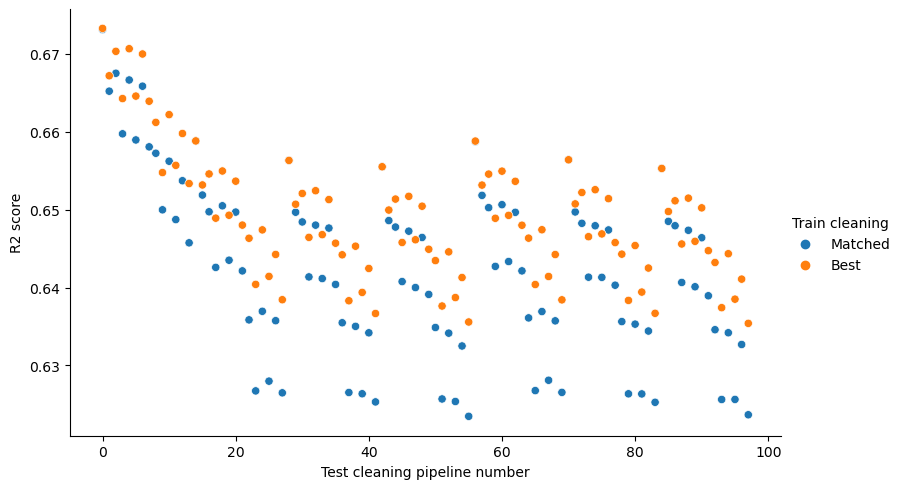

In [8]:
concatenated = pd.concat([airbnb_rfr_mean_df.loc[airbnb_rfr_mean_df.train_cleaning == airbnb_rfr_mean_df.test_cleaning].assign(train_cleaning='Matched'), 
                          airbnb_rfr_mean_df.loc[airbnb_rfr_mean_df.groupby('test_cleaning')['score'].idxmax()].assign(train_cleaning='Best')])

concatenated = concatenated.rename(columns={"train_cleaning": "Train cleaning", "test_cleaning": "Test cleaning pipeline number", 'score': 'R2 score',
                                     "model_type": 'Model type'})
fig = sns.relplot(x='Test cleaning pipeline number', y='R2 score', data=concatenated,
                hue='Train cleaning', aspect = 1.61)
plt.show()

##### Figure 6

C:\Users\jnevin\AppData\Local\Temp\ipykernel_24824\811109085.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_rfr_best_df['train_cleaning'] = 'Best'
C:\Users\jnevin\AppData\Local\Temp\ipykernel_24824\811109085.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_rfr_matched_df['train_cleaning'] = 'Matched'


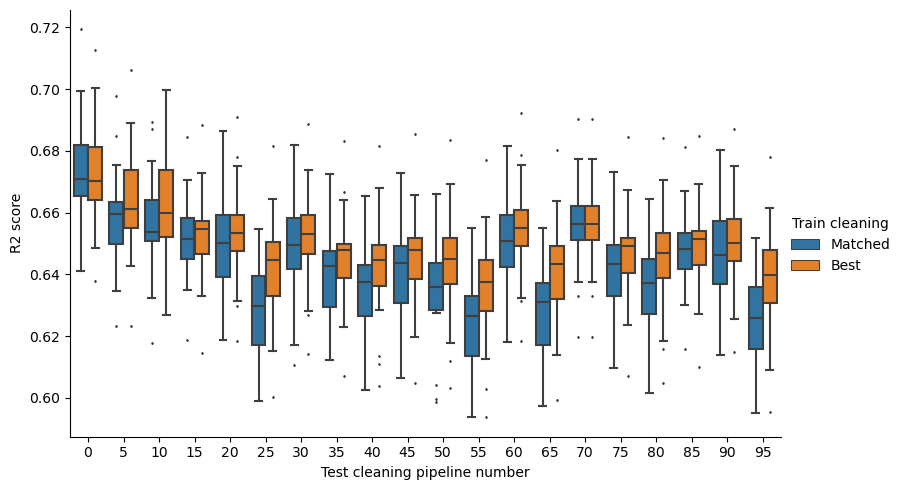

In [9]:
airbnb_rfr_matched_df = airbnb_rfr_results.loc[airbnb_rfr_results.train_cleaning == airbnb_rfr_results.test_cleaning]

airbnb_best_rfr = airbnb_rfr_mean_df[['train_cleaning', 'test_cleaning']].loc[airbnb_rfr_mean_df.groupby('test_cleaning')['score'].idxmax()]
airbnb_best_tuple_list = list(zip(airbnb_best_rfr.train_cleaning, airbnb_best_rfr.test_cleaning))
airbnb_rfr_best_df = airbnb_rfr_results.loc[list(map(lambda x: x in airbnb_best_tuple_list, zip(airbnb_rfr_results['train_cleaning'], airbnb_rfr_results['test_cleaning']))),:]

airbnb_rfr_best_df['train_cleaning'] = 'Best'
airbnb_rfr_matched_df['train_cleaning'] = 'Matched'

combined_rfr_data = pd.concat([airbnb_rfr_matched_df, airbnb_rfr_best_df])
combined_rfr_data = combined_rfr_data.rename(columns={"train_cleaning": "Train cleaning", "test_cleaning": "Test cleaning pipeline number", 'score': 'R2 score'
                                                       ,"model_type": 'Model type'})

fig = sns.catplot(data=combined_rfr_data.loc[combined_rfr_data['Test cleaning pipeline number'].isin(list(np.arange(0, 100, 5)))], 
                  x="Test cleaning pipeline number", y="R2 score", hue="Train cleaning", fliersize = 1, kind="box", aspect = 1.61)
plt.show()

##### Statistical test

In [10]:
count = 0
for test_num in range(98):
    matched_scores = airbnb_rfr_matched_df['score'].loc[airbnb_rfr_matched_df.test_cleaning == test_num].values
    best_scores = airbnb_rfr_best_df['score'].loc[(airbnb_rfr_best_df.test_cleaning == test_num)].values
    
    if stats.ttest_rel(a=matched_scores, b=best_scores).pvalue < 0.05:
        count += 1
        
print('Number of statistically significant differences in means: ' + str(count))

Number of statistically significant differences in means: 87


##### Figure 7

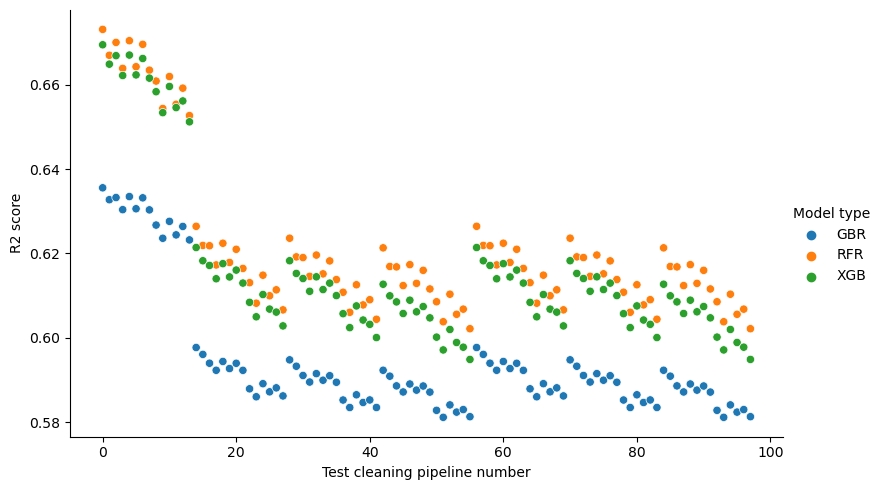

In [11]:
train_num = 0

gbr_dummy = airbnb_gbr_mean_df.loc[airbnb_gbr_mean_df.train_cleaning == train_num].copy()
gbr_dummy['model_type'] = 'GBR'

rfr_dummy = airbnb_rfr_mean_df.loc[airbnb_rfr_mean_df.train_cleaning == train_num].copy()
rfr_dummy['model_type'] = 'RFR'

xgb_dummy = airbnb_xgb_mean_df.loc[airbnb_xgb_mean_df.train_cleaning == train_num].copy()
xgb_dummy['model_type'] = 'XGB'

all_dummy = pd.concat([gbr_dummy, rfr_dummy, xgb_dummy])

all_dummy = all_dummy.rename(columns={"train_cleaning": "Train cleaning", "test_cleaning": "Test cleaning pipeline number", 'score': 'R2 score',
                                     "model_type": 'Model type'})

fig = sns.relplot(data=all_dummy, x='Test cleaning pipeline number', y='R2 score', hue='Model type', aspect=1.61)
plt.show()

##### Figure 8

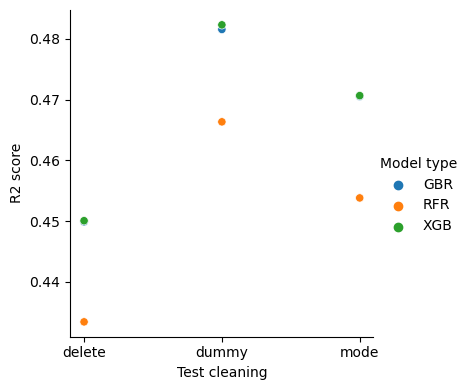

In [12]:
train_cleaning= 'dummy'

gbr_dummy = uscensus_gbr_mean_df.loc[uscensus_gbr_mean_df.train_cleaning == train_cleaning].copy()
gbr_dummy['model_type'] = 'GBR'

rfr_dummy = uscensus_rfr_mean_df.loc[uscensus_rfr_mean_df.train_cleaning == train_cleaning].copy()
rfr_dummy['model_type'] = 'RFR'

xgb_dummy = uscensus_xgb_mean_df.loc[uscensus_xgb_mean_df.train_cleaning == train_cleaning].copy()
xgb_dummy['model_type'] = 'XGB'

all_dummy = pd.concat([gbr_dummy, rfr_dummy, xgb_dummy])

all_dummy = all_dummy.rename(columns={"train_cleaning": "Train cleaning", "test_cleaning": "Test cleaning", 'score': 'R2 score',
                                     "model_type": 'Model type'})

fig = sns.relplot(data=all_dummy, x='Test cleaning', y='R2 score', hue='Model type', height = 4)#aspect=1.61)
plt.show()